In [1]:
%matplotlib inline
import polars as pl
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'

pl.Config.set_tbl_cols(60)
pl.Config.set_fmt_str_lengths(5000)

plt.rcParams['figure.figsize'] = (15, 5)

# Summary

By the end of this chapter, we're going to have downloaded all of Canada's weather data for 2012, and saved it to a CSV. 

We'll do this by downloading it one month at a time, and then combining all the months together.

Here's the temperature every hour for 2012!

In [2]:
weather_2012_final = pl.read_csv('./data/weather_2012.csv',separator=',',encoding='latin1').with_columns(pl.col('Date/Time (LST)').str.strptime(pl.Datetime, format='%Y-%m-%d %H:%M'))
weather_2012_final = weather_2012_final.with_columns([pl.col('Date/Time (LST)').cast(pl.Datetime)]).sort('Date/Time (LST)')
weather_2012_final

ï»¿Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (C),Temp Flag,Dew Point Temp (C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Precip. Amount (mm),Precip. Amount Flag,Wind Dir (10s deg),Wind Dir Flag,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
f64,f64,str,i64,datetime[μs],i64,i64,i64,str,f64,str,f64,str,i64,str,str,str,i64,str,i64,str,f64,str,f64,str,str,str,i64,str,str
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-01 00:00:00,2012,3,1,"""00:00""",-5.5,null,-9.7,null,72,null,null,null,5,null,24,null,4.0,null,100.97,null,null,null,-13,null,"""Snow"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-01 01:00:00,2012,3,1,"""01:00""",-5.7,null,-8.7,null,79,null,null,null,6,null,26,null,2.4,null,100.87,null,null,null,-13,null,"""Snow"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-01 02:00:00,2012,3,1,"""02:00""",-5.4,null,-8.3,null,80,null,null,null,5,null,28,null,4.8,null,100.8,null,null,null,-13,null,"""Snow"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-01 03:00:00,2012,3,1,"""03:00""",-4.7,null,-7.7,null,79,null,null,null,5,null,28,null,4.0,null,100.69,null,null,null,-12,null,"""Snow"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-01 04:00:00,2012,3,1,"""04:00""",-5.4,null,-7.8,null,83,null,null,null,5,null,35,null,1.6,null,100.62,null,null,null,-14,null,"""Snow"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-31 19:00:00,2012,3,31,"""19:00""",5.9,null,-8.0,null,36,null,null,null,17,null,4,null,25.0,null,100.88,null,null,null,null,null,"""Clear"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-31 20:00:00,2012,3,31,"""20:00""",4.4,null,-7.2,null,43,null,null,null,16,null,9,null,25.0,null,100.85,null,null,null,null,null,"""Clear"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-31 21:00:00,2012,3,31,"""21:00""",2.6,null,-6.3,null,52,null,null,null,24,null,7,null,25.0,null,100.86,null,null,null,null,null,"""Clear"""


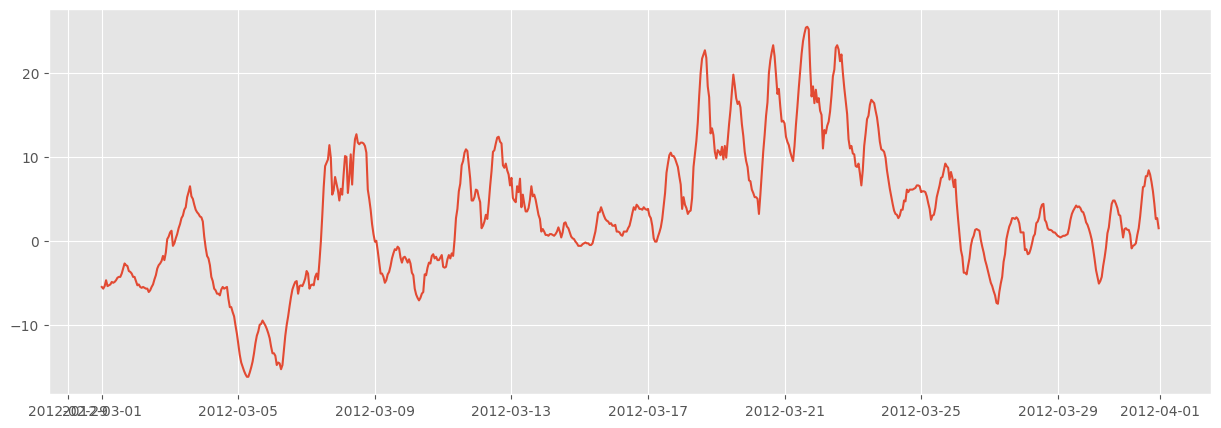

In [3]:
dates = weather_2012_final["Date/Time (LST)"].to_numpy()
values = weather_2012_final['Temp (C)'].to_numpy()
plt.plot(dates, values)
plt.show()

# 5.1 Downloading one month of weather data

When playing with the cycling data, I wanted temperature and precipitation data to find out if people like biking when it's raining. So I went to the site for [Canadian historical weather data](http://climate.weather.gc.ca/index_e.html#access), and figured out how to get it automatically.

Here we're going to get the data for March 2012, and clean it up

Here's an URL template you can use to get data in Montreal. 

In [4]:
#downloading via URLS doesn't work in Jupyterlite

In [5]:
url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data\\"

To get the data for March 2013, we need to format it with `month=3, year=2012`.

In [ ]:
url = url_template.format(month=3, year=2012)
print(url)
weather_mar2012 = pl.read_csv(url,separator=',',encoding='latin1').with_columns(pl.col('Date/Time (LST)').str.strptime(pl.Datetime, format='%Y-%m-%d %H:%M'))
weather_mar2012 = weather_mar2012.with_columns([pl.col('Date/Time (LST)').cast(pl.Datetime)]).sort('Date/Time (LST)')


http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year=2012&Month=3&timeframe=1&submit=Download+Data\


This is super great! We can just use the same `read_csv` function as before, and just give it a URL as a filename. Awesome.

In [11]:
weather_mar2012

"ï»¿""Longitude (x)""",Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (Â°C),Temp Flag,Dew Point Temp (Â°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Precip. Amount (mm),Precip. Amount Flag,Wind Dir (10s deg),Wind Dir Flag,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
f64,f64,str,i64,datetime[μs],i64,i64,i64,str,f64,str,f64,str,i64,str,str,str,i64,str,i64,str,f64,str,f64,str,str,str,str,str,str
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-01 00:00:00,2012,3,1,"""00:00""",-5.5,"""""",-9.7,"""""",72,"""""","""""","""""",5,"""""",24,"""""",4.0,"""""",100.97,"""""","""""","""""","""-13""","""""","""Snow"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-01 01:00:00,2012,3,1,"""01:00""",-5.7,"""""",-8.7,"""""",79,"""""","""""","""""",6,"""""",26,"""""",2.4,"""""",100.87,"""""","""""","""""","""-13""","""""","""Snow"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-01 02:00:00,2012,3,1,"""02:00""",-5.4,"""""",-8.3,"""""",80,"""""","""""","""""",5,"""""",28,"""""",4.8,"""""",100.8,"""""","""""","""""","""-13""","""""","""Snow"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-01 03:00:00,2012,3,1,"""03:00""",-4.7,"""""",-7.7,"""""",79,"""""","""""","""""",5,"""""",28,"""""",4.0,"""""",100.69,"""""","""""","""""","""-12""","""""","""Snow"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-01 04:00:00,2012,3,1,"""04:00""",-5.4,"""""",-7.8,"""""",83,"""""","""""","""""",5,"""""",35,"""""",1.6,"""""",100.62,"""""","""""","""""","""-14""","""""","""Snow"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-31 19:00:00,2012,3,31,"""19:00""",5.9,"""""",-8.0,"""""",36,"""""","""""","""""",17,"""""",4,"""""",25.0,"""""",100.88,"""""","""""","""""","""""","""""","""Clear"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-31 20:00:00,2012,3,31,"""20:00""",4.4,"""""",-7.2,"""""",43,"""""","""""","""""",16,"""""",9,"""""",25.0,"""""",100.85,"""""","""""","""""","""""","""""","""Clear"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-31 21:00:00,2012,3,31,"""21:00""",2.6,"""""",-6.3,"""""",52,"""""","""""","""""",24,"""""",7,"""""",25.0,"""""",100.86,"""""","""""","""""","""""","""""","""Clear"""


Let's plot it!

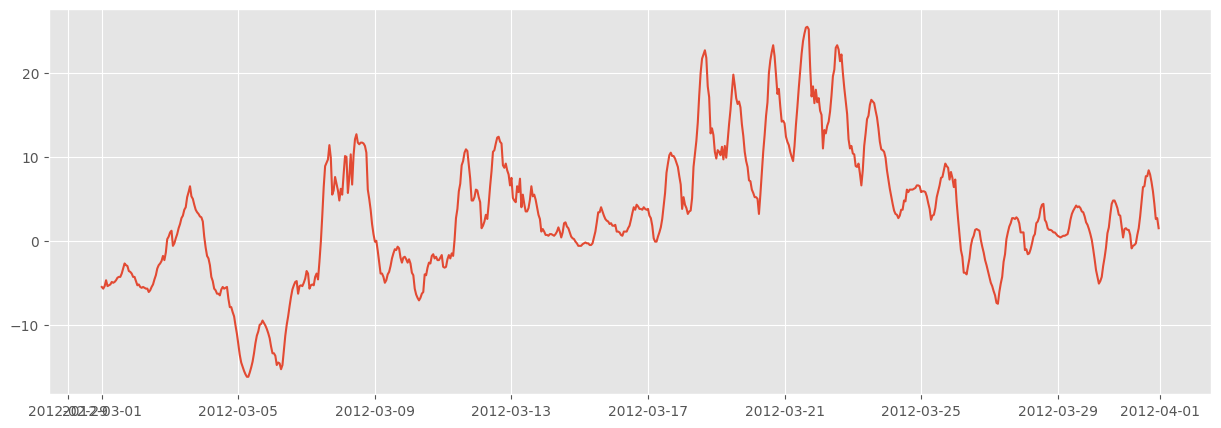

In [14]:
dates = weather_mar2012['Date/Time (LST)'].to_numpy()
values = weather_mar2012['Temp (Â°C)'].to_numpy()
plt.plot(dates, values)
plt.show()

Let's fix up the columns. We're going to just print them out, copy, and fix them up by hand.

In [ ]:
weather_mar2012.columns

# 'ï»¿"Longitude (x)"',
#  'Latitude (y)',
#  'Station Name',
#  'Climate ID',
#  'Date/Time (LST)',
#  'Year',
#  'Month',
#  'Day',
#  'Time (LST)',
#  'Temp (Â°C)',
#  'Temp Flag',
#  'Dew Point Temp (Â°C)',
#  'Dew Point Temp Flag',
#  'Rel Hum (%)',
#  'Rel Hum Flag',
#  'Precip. Amount (mm)',
#  'Precip. Amount Flag',
#  'Wind Dir (10s deg)',
#  'Wind Dir Flag',
#  'Wind Spd (km/h)',
#  'Wind Spd Flag',
#  'Visibility (km)',
#  'Visibility Flag',
#  'Stn Press (kPa)',
#  'Stn Press Flag',
#  'Hmdx',
#  'Hmdx Flag',
#  'Wind Chill',
#  'Wind Chill Flag',
#  'Weather'

['ï»¿"Longitude (x)"',
 'Latitude (y)',
 'Station Name',
 'Climate ID',
 'Date/Time (LST)',
 'Year',
 'Month',
 'Day',
 'Time (LST)',
 'Temp (Â°C)',
 'Temp Flag',
 'Dew Point Temp (Â°C)',
 'Dew Point Temp Flag',
 'Rel Hum (%)',
 'Rel Hum Flag',
 'Precip. Amount (mm)',
 'Precip. Amount Flag',
 'Wind Dir (10s deg)',
 'Wind Dir Flag',
 'Wind Spd (km/h)',
 'Wind Spd Flag',
 'Visibility (km)',
 'Visibility Flag',
 'Stn Press (kPa)',
 'Stn Press Flag',
 'Hmdx',
 'Hmdx Flag',
 'Wind Chill',
 'Wind Chill Flag',
 'Weather']

You'll notice in the summary above that there are a few columns which are are either entirely empty or only have a few values in them. Let's get rid of all of those with `dropna`.

The argument `axis=1` to `dropna` means "drop columns", not rows", and `how='any'` means "drop the column if any value is null". 

This is much better now -- we only have columns with real data.

In [16]:
weather_mar2012 = weather_mar2012.drop_nulls(None)
weather_mar2012[:5]

"ï»¿""Longitude (x)""",Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (Â°C),Temp Flag,Dew Point Temp (Â°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Precip. Amount (mm),Precip. Amount Flag,Wind Dir (10s deg),Wind Dir Flag,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
f64,f64,str,i64,datetime[μs],i64,i64,i64,str,f64,str,f64,str,i64,str,str,str,i64,str,i64,str,f64,str,f64,str,str,str,str,str,str
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-01 00:00:00,2012,3,1,"""00:00""",-5.5,"""""",-9.7,"""""",72,"""""","""""","""""",5,"""""",24,"""""",4.0,"""""",100.97,"""""","""""","""""","""-13""","""""","""Snow"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-01 01:00:00,2012,3,1,"""01:00""",-5.7,"""""",-8.7,"""""",79,"""""","""""","""""",6,"""""",26,"""""",2.4,"""""",100.87,"""""","""""","""""","""-13""","""""","""Snow"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-01 02:00:00,2012,3,1,"""02:00""",-5.4,"""""",-8.3,"""""",80,"""""","""""","""""",5,"""""",28,"""""",4.8,"""""",100.8,"""""","""""","""""","""-13""","""""","""Snow"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-01 03:00:00,2012,3,1,"""03:00""",-4.7,"""""",-7.7,"""""",79,"""""","""""","""""",5,"""""",28,"""""",4.0,"""""",100.69,"""""","""""","""""","""-12""","""""","""Snow"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-01 04:00:00,2012,3,1,"""04:00""",-5.4,"""""",-7.8,"""""",83,"""""","""""","""""",5,"""""",35,"""""",1.6,"""""",100.62,"""""","""""","""""","""-14""","""""","""Snow"""


The Year/Month/Day/Time columns are redundant, though. Let's get rid of those.

In [18]:
weather_mar2012 = weather_mar2012.drop(['Year', 'Month', 'Day', 'Time (LST)'])
weather_mar2012[:5]

"ï»¿""Longitude (x)""",Latitude (y),Station Name,Climate ID,Date/Time (LST),Temp (Â°C),Temp Flag,Dew Point Temp (Â°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Precip. Amount (mm),Precip. Amount Flag,Wind Dir (10s deg),Wind Dir Flag,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
f64,f64,str,i64,datetime[μs],f64,str,f64,str,i64,str,str,str,i64,str,i64,str,f64,str,f64,str,str,str,str,str,str
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-01 00:00:00,-5.5,"""""",-9.7,"""""",72,"""""","""""","""""",5,"""""",24,"""""",4.0,"""""",100.97,"""""","""""","""""","""-13""","""""","""Snow"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-01 01:00:00,-5.7,"""""",-8.7,"""""",79,"""""","""""","""""",6,"""""",26,"""""",2.4,"""""",100.87,"""""","""""","""""","""-13""","""""","""Snow"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-01 02:00:00,-5.4,"""""",-8.3,"""""",80,"""""","""""","""""",5,"""""",28,"""""",4.8,"""""",100.8,"""""","""""","""""","""-13""","""""","""Snow"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-01 03:00:00,-4.7,"""""",-7.7,"""""",79,"""""","""""","""""",5,"""""",28,"""""",4.0,"""""",100.69,"""""","""""","""""","""-12""","""""","""Snow"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2012-03-01 04:00:00,-5.4,"""""",-7.8,"""""",83,"""""","""""","""""",5,"""""",35,"""""",1.6,"""""",100.62,"""""","""""","""""","""-14""","""""","""Snow"""


Awesome! We now only have the relevant columns, and it's much more manageable.

# 5.2 Plotting the temperature by hour of day

This one's just for fun -- we've already done this before, using groupby and aggregate! We will learn whether or not it gets colder at night. Well, obviously. But let's do it anyway.

<bound method DataFrame.head of shape: (715, 1)
┌────────────┐
│ Temp (Â°C) │
│ ---        │
│ f64        │
╞════════════╡
│ -5.5       │
│ -5.7       │
│ -5.4       │
│ -4.7       │
│ -5.4       │
│ …          │
│ 7.9        │
│ 7.0        │
│ 5.9        │
│ 4.4        │
│ 2.6        │
└────────────┘>


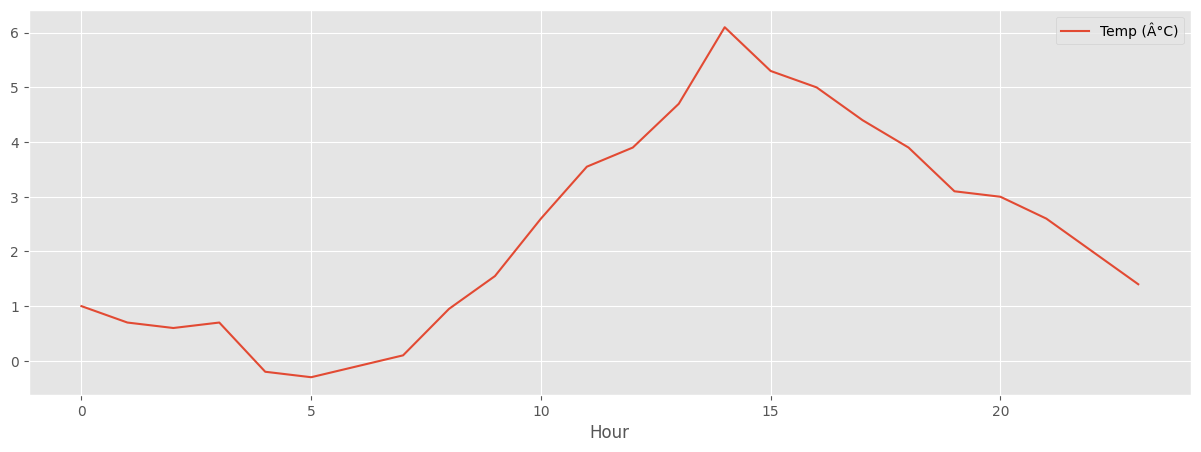

In [ ]:
temperatures = weather_mar2012.select('Temp (Â°C)').clone()
print(temperatures.head)

weather_mar2012 = weather_mar2012.with_columns(
    pl.col('Date/Time (LST)').dt.hour().alias('Hour'))  

weather_mar2012.group_by('Hour').agg(pl.col('Temp (Â°C)').median()).sort('Hour').to_pandas().plot(x='Hour',)
plt.show()

So it looks like the time with the highest median temperature is 2pm. Neat.

# 5.3 Getting the whole year of data

Okay, so what if we want the data for the whole year? Ideally the API would just let us download that, but I couldn't figure out a way to do that.

First, let's put our work from above into a function that gets the weather for a given month. 


In [30]:
def download_weather_month(year, month):
    if month == 1:
        year += 1
    url = url_template.format(year=year, month=month)
    weather_data = pl.read_csv(url,separator=',',encoding='latin1').with_columns(pl.col('Date/Time (LST)').str.strptime(pl.Datetime, format='%Y-%m-%d %H:%M'))
    weather_data = weather_data.drop_nulls(None)
    weather_data.columns = [col.replace('\xb0', '') for col in weather_data.columns]
    weather_data = weather_data.drop(['Year', 'Day', 'Month', 'Time (LST)'])
    return weather_data

We can test that this function does the right thing:

In [31]:
download_weather_month(2012, 1)[:5]

"ï»¿""Longitude (x)""",Latitude (y),Station Name,Climate ID,Date/Time (LST),Temp (ÂC),Temp Flag,Dew Point Temp (ÂC),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Precip. Amount (mm),Precip. Amount Flag,Wind Dir (10s deg),Wind Dir Flag,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
f64,f64,str,i64,datetime[μs],f64,str,f64,str,i64,str,str,str,str,str,i64,str,f64,str,f64,str,str,str,str,str,str
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2013-01-01 00:00:00,-1.0,"""""",-1.7,"""""",95,"""""","""""","""""","""26""","""""",35,"""""",6.4,"""""",99.89,"""""","""""","""""","""-8""","""""","""Snow"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2013-01-01 01:00:00,-2.0,"""""",-5.1,"""""",79,"""""","""""","""""","""27""","""""",35,"""""",16.1,"""""",99.93,"""""","""""","""""","""-10""","""""","""Mainly Clear"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2013-01-01 02:00:00,-2.7,"""""",-6.0,"""""",78,"""""","""""","""""","""30""","""""",28,"""""",19.3,"""""",100.08,"""""","""""","""""","""-10""","""""","""Snow"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2013-01-01 03:00:00,-5.6,"""""",-11.7,"""""",62,"""""","""""","""""","""28""","""""",30,"""""",25.0,"""""",100.21,"""""","""""","""""","""-14""","""""","""Clear"""
-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A""",7025250,2013-01-01 04:00:00,-7.7,"""""",-12.6,"""""",68,"""""","""""","""""","""29""","""""",35,"""""",19.3,"""""",100.32,"""""","""""","""""","""-17""","""""","""Mainly Clear"""


Now we can get all the months at once. This will take a little while to run.

In [ ]:
data_by_month = [download_weather_month(2012, i) for i in range(1, 13)]


In [58]:
# for some reason in data_by_month[2] this column is i64, all others is str
data_by_month[2] = data_by_month[2].with_columns(
    pl.col("Wind Dir (10s deg)").cast(pl.Utf8)  
)

Once we have this, it's easy to concatenate all the dataframes together into one big dataframe using `pd.concat`. And now we have the whole year's data!

In [61]:
weather_2012_all = pl.concat(data_by_month)
weather_2012_all

SchemaError: type Int64 is incompatible with expected type String

And we're done!